# Team 11 

## Water Potability

In [5]:
## importing the Modules 
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import warnings
warnings.simplefilter(action='ignore', category=Warning)

In [6]:
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, confusion_matrix, r2_score, accuracy_score
from sklearn.model_selection import (GridSearchCV, KFold, train_test_split, cross_val_score)

from imblearn.over_sampling import SMOTE
from collections import Counter

import plotly.express as px
import statsmodels.formula.api as smf
import statsmodels.api as sm
import plotly.express as px


In [7]:
from sklearn.linear_model import LogisticRegression,RidgeClassifier,SGDClassifier,PassiveAggressiveClassifier
from sklearn.linear_model import Perceptron
from sklearn.svm import SVC,LinearSVC,NuSVC
from sklearn.neighbors import KNeighborsClassifier,NearestCentroid
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB,BernoulliNB
from sklearn.ensemble import VotingClassifier

# Evaluation & CV Libraries
from sklearn.metrics import precision_score,accuracy_score
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV,RepeatedStratifiedKFold

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from catboost import CatBoostClassifier

1. ph: pH of 1. water (0 to 14). WHO Recommendataion (6.5-8.5)
2. Hardness: Capacity of water to precipitate soap in mg/L.
3. Solids: Total dissolved solids in ppm. Desirable TDS < 500
4. Chloramines: Amount of Chloramines in ppm. up to 4mg/L safe to drink
5. Sulfate: Amount of Sulfates dissolved in mg/L. 3-30 mg/L in Fresh water 
6. Conductivity: Electrical conductivity of water in μS/cm. EC value should not exceeded 400 μS/cm.
7. Organic_carbon: Amount of organic carbon in ppm.  < 2 mg/L as TOC in treated / drinking water
8. Trihalomethanes: Amount of Trihalomethanes in μg/L.
9. Turbidity: Measure of light emiting property of water in NTU, WHO recommended value of 5.00 NTU.
10. Potability: Indicates if water is safe for human consumption. Potable = 1 and Not potable = 0

## intention: 
- predict the Potability of the water , Train our model to predict 

## Data info and Preparation  -- Prahalad 

In [8]:
df = pd.read_csv("water_potability.csv")

df.head()

ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
0       NaN  204.890455  20791.318981     7.300212  368.516441    564.308654   
1  3.716080  129.422921  18630.057858     6.635246         NaN    592.885359   
2  8.099124  224.236259  19909.541732     9.275884         NaN    418.606213   
3  8.316766  214.373394  22018.417441     8.059332  356.886136    363.266516   
4  9.092223  181.101509  17978.986339     6.546600  310.135738    398.410813   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       10.379783        86.990970   2.963135           0  
1       15.180013        56.329076   4.500656           0  
2       16.868637        66.420093   3.055934           0  
3       18.436524       100.341674   4.628771           0  
4       11.558279        31.997993   4.075075           0

In [9]:
print(df.info())
print("*"*30)
print(df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB
None
******************************
(3276, 10)


In [10]:
df.isna().sum().to_frame(name = "NaN")

NaN
ph               491
Hardness           0
Solids             0
Chloramines        0
Sulfate          781
Conductivity       0
Organic_carbon     0
Trihalomethanes  162
Turbidity          0
Potability         0

In [11]:
df.skew(axis=0).to_frame(name='Skewed Values')

Skewed Values
ph                    0.025630
Hardness             -0.039342
Solids                0.621634
Chloramines          -0.012098
Sulfate              -0.035947
Conductivity          0.264490
Organic_carbon        0.025533
Trihalomethanes      -0.083031
Turbidity            -0.007817
Potability            0.450784

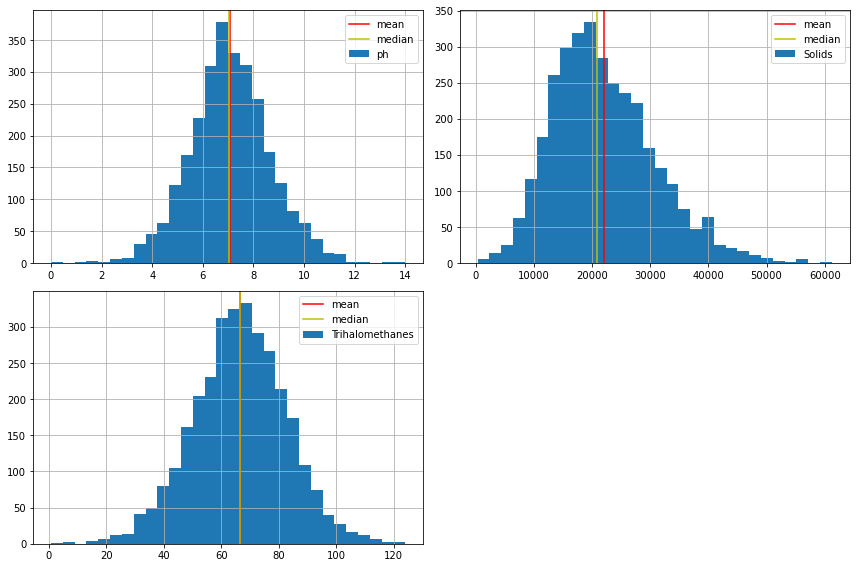

In [12]:
plt.figure(figsize=(12, 8))
plt.style.use('default')
plt.subplot(221 )
plot1 = df["ph"].hist(bins=30, label = "ph")
plt.axvline(df["ph"].mean(), color ='r', label = "mean")
plt.axvline(df["ph"].median(), color ='y', label = "median")
plt.legend()
plt.subplot(222)
plot2 = df["Solids"].hist(bins=30 , label = "Solids" )
plt.axvline(df["Solids"].mean(), color ='r', label = "mean")
plt.axvline(df["Solids"].median(), color ='y', label = "median")
plt.legend()
plt.subplot(223 )
plot3 =  df["Trihalomethanes"].hist(bins=30 ,  label = "Trihalomethanes" )
plt.axvline(df["Trihalomethanes"].mean(), color ='r', label = "mean")
plt.axvline(df["Trihalomethanes"].median(), color ='y', label = "median")

plt.tight_layout()
plt.legend()
plt.show()

In [13]:
#ph values are evenly distributed so we can use mean
df['ph'].fillna(df['ph'].mean(),inplace=True)
#sulphate values are slightly on the right side and it has outliers which may affect mean hence we will use median here
df['Sulfate'].fillna(df['Sulfate'].median(),inplace=True)
#Trihalomethanes values are evenly distributed so we will use mean
df['Trihalomethanes'].fillna(df['Trihalomethanes'].mean(),inplace=True)

In [14]:
df.isna().sum().to_frame(name = "NaN")

NaN
ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0

In [15]:
df2 = df[df.columns[:-1]]
df2.head()
# df2 = df[["ph","Solids"]]

ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
0  7.080795  204.890455  20791.318981     7.300212  368.516441    564.308654   
1  3.716080  129.422921  18630.057858     6.635246  333.073546    592.885359   
2  8.099124  224.236259  19909.541732     9.275884  333.073546    418.606213   
3  8.316766  214.373394  22018.417441     8.059332  356.886136    363.266516   
4  9.092223  181.101509  17978.986339     6.546600  310.135738    398.410813   

   Organic_carbon  Trihalomethanes  Turbidity  
0       10.379783        86.990970   2.963135  
1       15.180013        56.329076   4.500656  
2       16.868637        66.420093   3.055934  
3       18.436524       100.341674   4.628771  
4       11.558279        31.997993   4.075075

## Data interpretation -- Kaushik

In [16]:
df.describe().T

count          mean          std         min           25%  \
ph               3276.0      7.080795     1.469956    0.000000      6.277673   
Hardness         3276.0    196.369496    32.879761   47.432000    176.850538   
Solids           3276.0  22014.092526  8768.570828  320.942611  15666.690297   
Chloramines      3276.0      7.122277     1.583085    0.352000      6.127421   
Sulfate          3276.0    333.608364    36.143851  129.000000    317.094638   
Conductivity     3276.0    426.205111    80.824064  181.483754    365.734414   
Organic_carbon   3276.0     14.284970     3.308162    2.200000     12.065801   
Trihalomethanes  3276.0     66.396293    15.769881    0.738000     56.647656   
Turbidity        3276.0      3.966786     0.780382    1.450000      3.439711   
Potability       3276.0      0.390110     0.487849    0.000000      0.000000   

                          50%           75%           max  
ph                   7.080795      7.870050     14.000000  
Hardness           196.967627    216.667456    323.124000  
Solids           20927.833607  27332.762127  61227.196008  
Chloramines          7.130299      8.114887     13.127000  
Sulfate            333.073546    350.385756    481.030642  
Conductivity       421.884968    481.792304    753.342620  
Organic_carbon      14.218338     16.557652     28.300000  
Trihalomethanes     66.396293     76.666609    124.000000  
Turbidity            3.955028      4.500320      6.739000  
Potability           0.000000      1.000000      1.000000

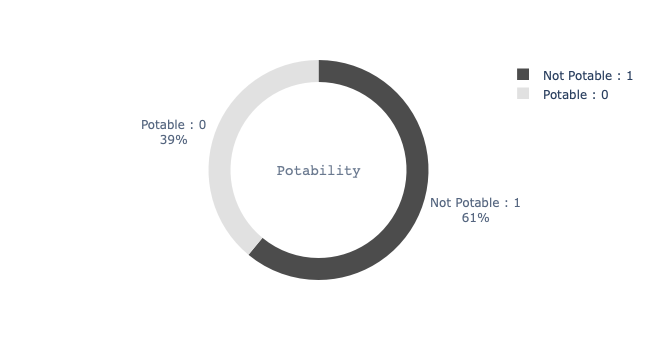

In [17]:
d= pd.DataFrame(df['Potability'].value_counts())
colors_dark = ["#1F1F1F", "#313131", '#636363', '#AEAEAE', '#DADADA']
#sns.palplot(colors_dark)
fig = px.pie(d,values='Potability',names=['Not Potable : 1','Potable : 0'],hole=0.8,opacity=0.8,
            color_discrete_sequence=[colors_dark[0],colors_dark[4]],
             labels={'1' : 'Not Potable', '0' : 'Potable','Potability':'Sample Numbers'})

#fig.add_annotation(text='We can resample the data<br> to get a balanced dataset',
                   #x=1.2,y=0.9,showarrow=False,font_size=12,opacity=0.7,font_family='monospace')

fig.add_annotation(text='Potability',
                   x=0.5,y=0.5,showarrow=False,font_size=14,opacity=0.7,font_family='monospace')

#fig.update_layout(
    #font_family='monospace',
    #title=dict(text='Q. How many samples of water are Potable?',x=0.47,y=0.98,
     #          font=dict(color=colors_dark[2],size=20)),
    #legend=dict(x=0.37,y=-0.05,orientation='h',traceorder='reversed'),
    #hoverlabel=dict(bgcolor='white'))

fig.update_traces(textposition='outside', textinfo='percent+label')

fig.show()



In [18]:
df.groupby("Potability").median()

ph    Hardness        Solids  Chloramines     Sulfate  \
Potability                                                                
0           7.080795  197.123423  20809.618280     7.090334  333.073546   
1           7.080795  196.632907  21199.386614     7.215163  333.073546   

            Conductivity  Organic_carbon  Trihalomethanes  Turbidity  
Potability                                                            
0             422.229331       14.293508        66.396293   3.948076  
1             420.712729       14.162809        66.396293   3.958576

In [19]:
df.groupby("Potability").mean()

ph    Hardness        Solids  Chloramines     Sulfate  \
Potability                                                                
0           7.084658  196.733292  21777.490788     7.092175  334.200184   
1           7.074754  195.800744  22383.991018     7.169338  332.683125   

            Conductivity  Organic_carbon  Trihalomethanes  Turbidity  
Potability                                                            
0             426.730454       14.364335        66.308522   3.965800  
1             425.383800       14.160893        66.533513   3.968328

In [20]:
df.groupby("Potability").agg({"ph": "mean"})

ph
Potability          
0           7.084658
1           7.074754

In [21]:
df.groupby("Potability").agg(["mean", "median"])

ph              Hardness                    Solids  \
                mean    median        mean      median          mean   
Potability                                                             
0           7.084658  7.080795  196.733292  197.123423  21777.490788   
1           7.074754  7.080795  195.800744  196.632907  22383.991018   

                         Chloramines               Sulfate              \
                  median        mean    median        mean      median   
Potability                                                               
0           20809.618280    7.092175  7.090334  334.200184  333.073546   
1           21199.386614    7.169338  7.215163  332.683125  333.073546   

           Conductivity             Organic_carbon            Trihalomethanes  \
                   mean      median           mean     median            mean   
Potability                                                                      
0            426.730454  422.229331      14.364335  14.293508       66.308522   
1            425.383800  420.712729      14.160893  14.162809       66.533513   

                      Turbidity            
               median      mean    median  
Potability                                 
0           66.396293  3.965800  3.948076  
1           66.396293  3.968328  3.958576

## Data Visualization  -- Varshini

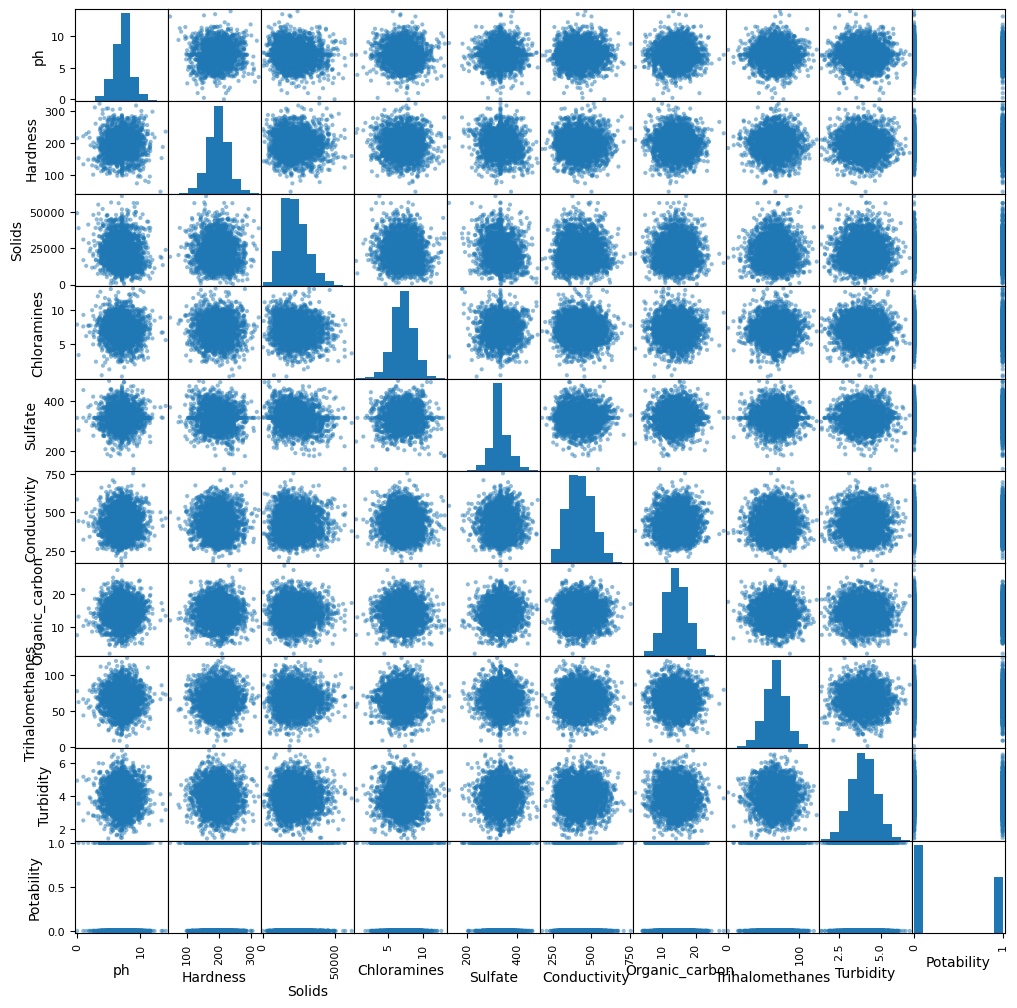

In [22]:
pd.plotting.scatter_matrix(df, figsize=(12, 12));

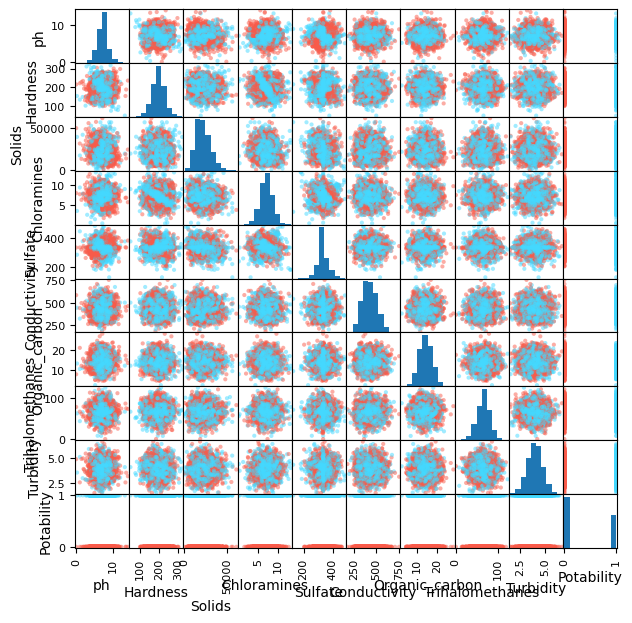

In [23]:
colors = df["Potability"].map(lambda x: "#44d9ff" if x else "#f95b4a")
pd.plotting.scatter_matrix(df, figsize=(7,7), color=colors);

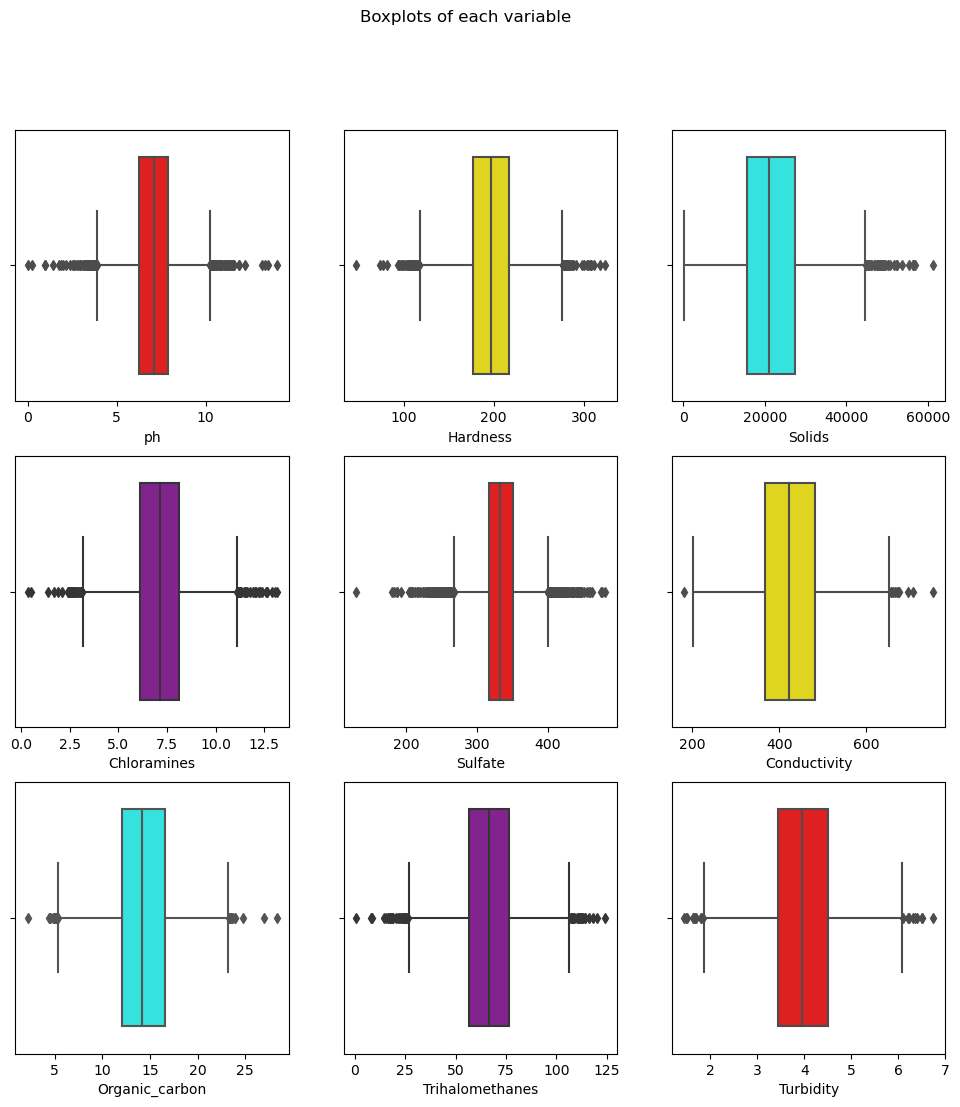

In [24]:

colors = ['#ff0000','#fff000','#18fff9','#8f139f']
fig, axes = plt.subplots(3,3 ,figsize=(12,12))
column = df.columns
fig.suptitle('Boxplots of each variable')
sns.boxplot(ax=axes[0,0],x=column[0],data=df,color=colors[0])
sns.boxplot(ax=axes[0,1],x=column[1],data=df,color=colors[1])
sns.boxplot(ax=axes[0,2],x=column[2],data=df,color=colors[2])
sns.boxplot(ax=axes[1,0],x=column[3],data=df,color=colors[3])
sns.boxplot(ax=axes[1,1],x=column[4],data=df,color=colors[0])
sns.boxplot(ax=axes[1,2],x=column[5],data=df,color=colors[1])
sns.boxplot(ax=axes[2,0],x=column[6],data=df,color=colors[2])
sns.boxplot(ax=axes[2,1],x=column[7],data=df,color=colors[3])
sns.boxplot(ax=axes[2,2],x=column[8],data=df,color=colors[0])
plt.show()

In [25]:
df.corr()

ph  Hardness    Solids  Chloramines   Sulfate  \
ph               1.000000  0.075833 -0.081884    -0.031811  0.014428   
Hardness         0.075833  1.000000 -0.046899    -0.030054 -0.092833   
Solids          -0.081884 -0.046899  1.000000    -0.070148 -0.149747   
Chloramines     -0.031811 -0.030054 -0.070148     1.000000  0.023762   
Sulfate          0.014428 -0.092833 -0.149747     0.023762  1.000000   
Conductivity     0.017192 -0.023915  0.013831    -0.020486 -0.014182   
Organic_carbon   0.040061  0.003610  0.010242    -0.012653  0.027102   
Trihalomethanes  0.002994 -0.012690 -0.008875     0.016627 -0.025696   
Turbidity       -0.036222 -0.014449  0.019546     0.002363 -0.009767   
Potability      -0.003287 -0.013837  0.033743     0.023779 -0.020476   

                 Conductivity  Organic_carbon  Trihalomethanes  Turbidity  \
ph                   0.017192        0.040061         0.002994  -0.036222   
Hardness            -0.023915        0.003610        -0.012690  -0.014449   
Solids               0.013831        0.010242        -0.008875   0.019546   
Chloramines         -0.020486       -0.012653         0.016627   0.002363   
Sulfate             -0.014182        0.027102        -0.025696  -0.009767   
Conductivity         1.000000        0.020966         0.001255   0.005798   
Organic_carbon       0.020966        1.000000        -0.012976  -0.027308   
Trihalomethanes      0.001255       -0.012976         1.000000  -0.021502   
Turbidity            0.005798       -0.027308        -0.021502   1.000000   
Potability          -0.008128       -0.030001         0.006960   0.001581   

                 Potability  
ph                -0.003287  
Hardness          -0.013837  
Solids             0.033743  
Chloramines        0.023779  
Sulfate           -0.020476  
Conductivity      -0.008128  
Organic_carbon    -0.030001  
Trihalomethanes    0.006960  
Turbidity          0.001581  
Potability         1.000000

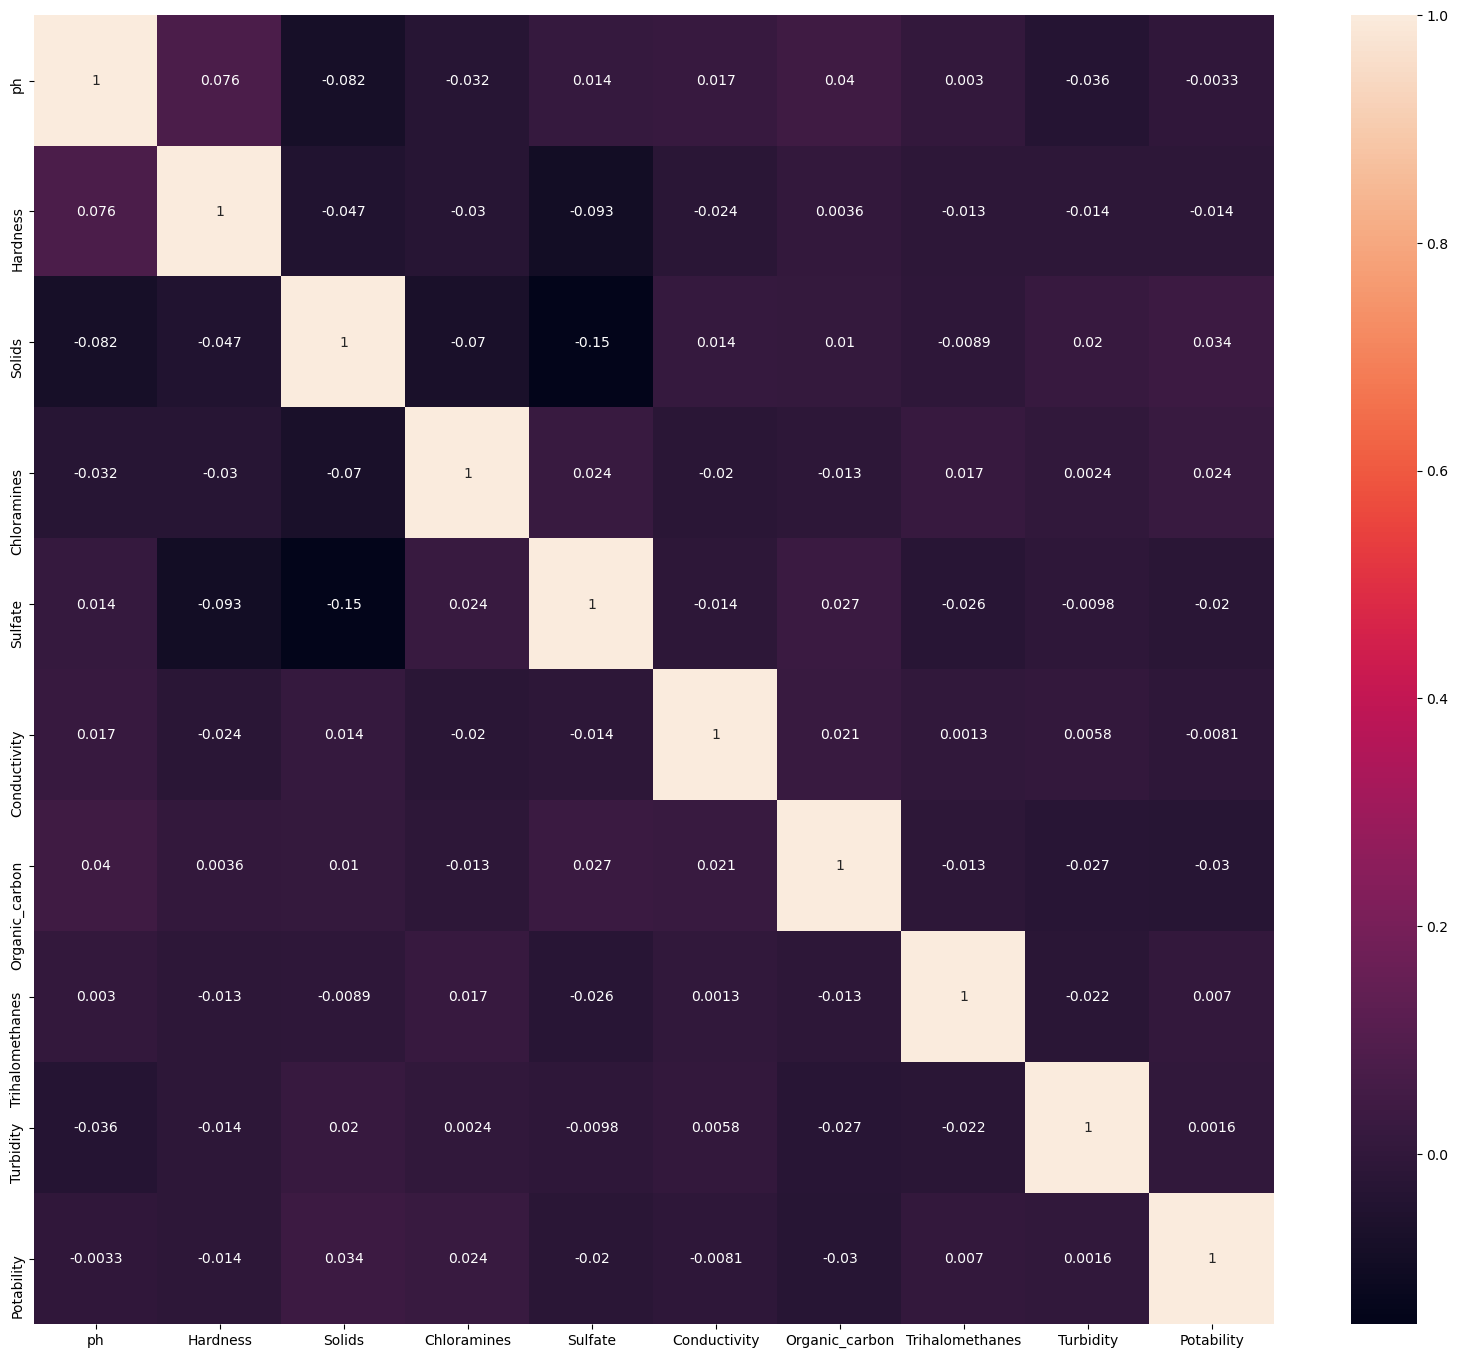

In [26]:
plt.figure(figsize=(20, 17))
sns.heatmap(df.corr(), annot=True)
plt.show()

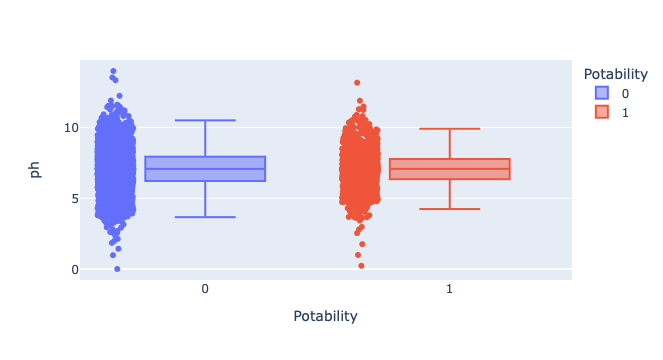

In [27]:
fig = px.box(df, x='Potability', y='ph', color="Potability", points='all')
fig.update_traces(quartilemethod="exclusive") # or "inclusive", or "linear" by default
fig.show()

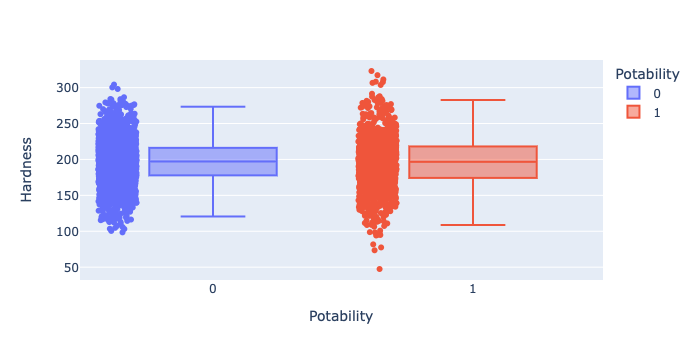

In [85]:
fig = px.box(df, x='Potability', y='Hardness', color="Potability", points='all')
fig.update_traces(quartilemethod="exclusive") # or "inclusive", or "linear" by default
fig.show()

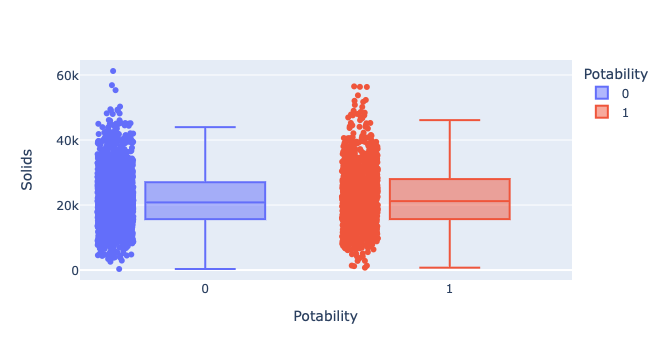

In [92]:
fig = px.box(df, x='Potability', y='Solids', color="Potability", points='all')
fig.update_traces(quartilemethod="exclusive") # or "inclusive", or "linear" by default
fig.show()

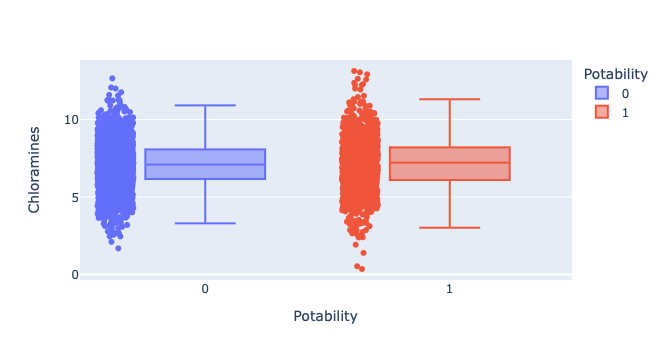

In [93]:
fig = px.box(df, x='Potability', y='Chloramines', color="Potability", points='all')
fig.update_traces(quartilemethod="exclusive") # or "inclusive", or "linear" by default
fig.show()

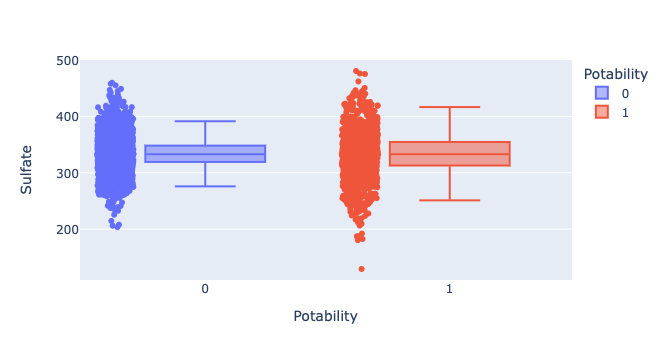

In [94]:
fig = px.box(df, x='Potability', y='Sulfate', color="Potability", points='all')
fig.update_traces(quartilemethod="exclusive") # or "inclusive", or "linear" by default
fig.show()

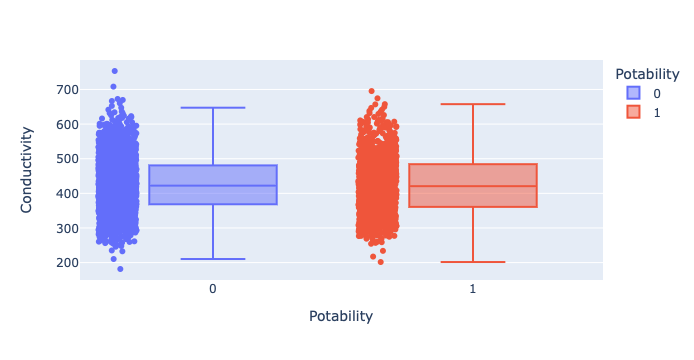

In [95]:
fig = px.box(df, x='Potability', y='Conductivity', color="Potability", points='all')
fig.update_traces(quartilemethod="exclusive") # or "inclusive", or "linear" by default
fig.show()

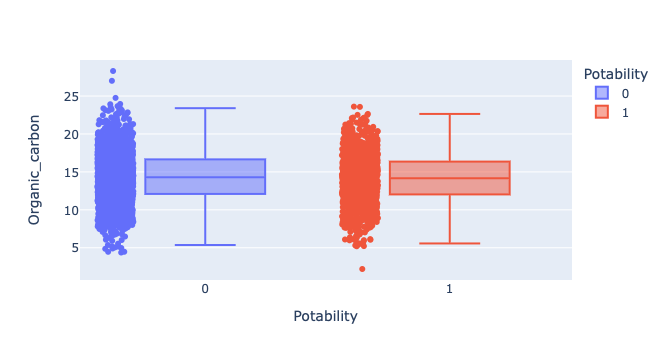

In [96]:
fig = px.box(df, x='Potability', y='Organic_carbon', color="Potability", points='all')
fig.update_traces(quartilemethod="exclusive") # or "inclusive", or "linear" by default
fig.show()


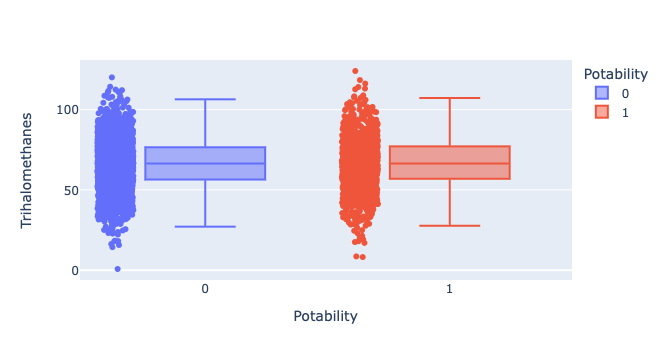

In [97]:
fig = px.box(df, x='Potability', y='Trihalomethanes', color="Potability", points='all')
fig.update_traces(quartilemethod="exclusive") # or "inclusive", or "linear" by default
fig.show()

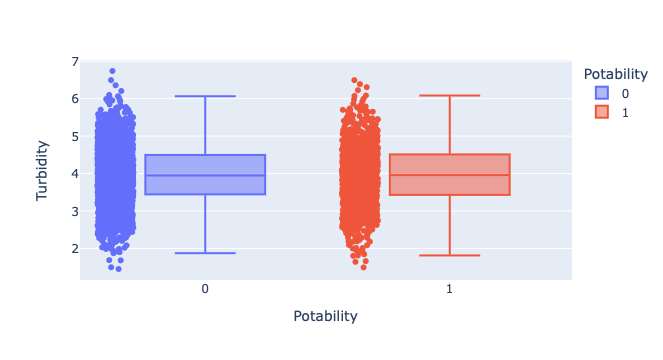

In [98]:
fig = px.box(df, x='Potability', y='Turbidity', color="Potability", points='all')
fig.update_traces(quartilemethod="exclusive") # or "inclusive", or "linear" by default
fig.show()

## Data Modelling 

In [28]:
x = df.drop(['Potability'],axis=True)
y = df['Potability']

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=101)

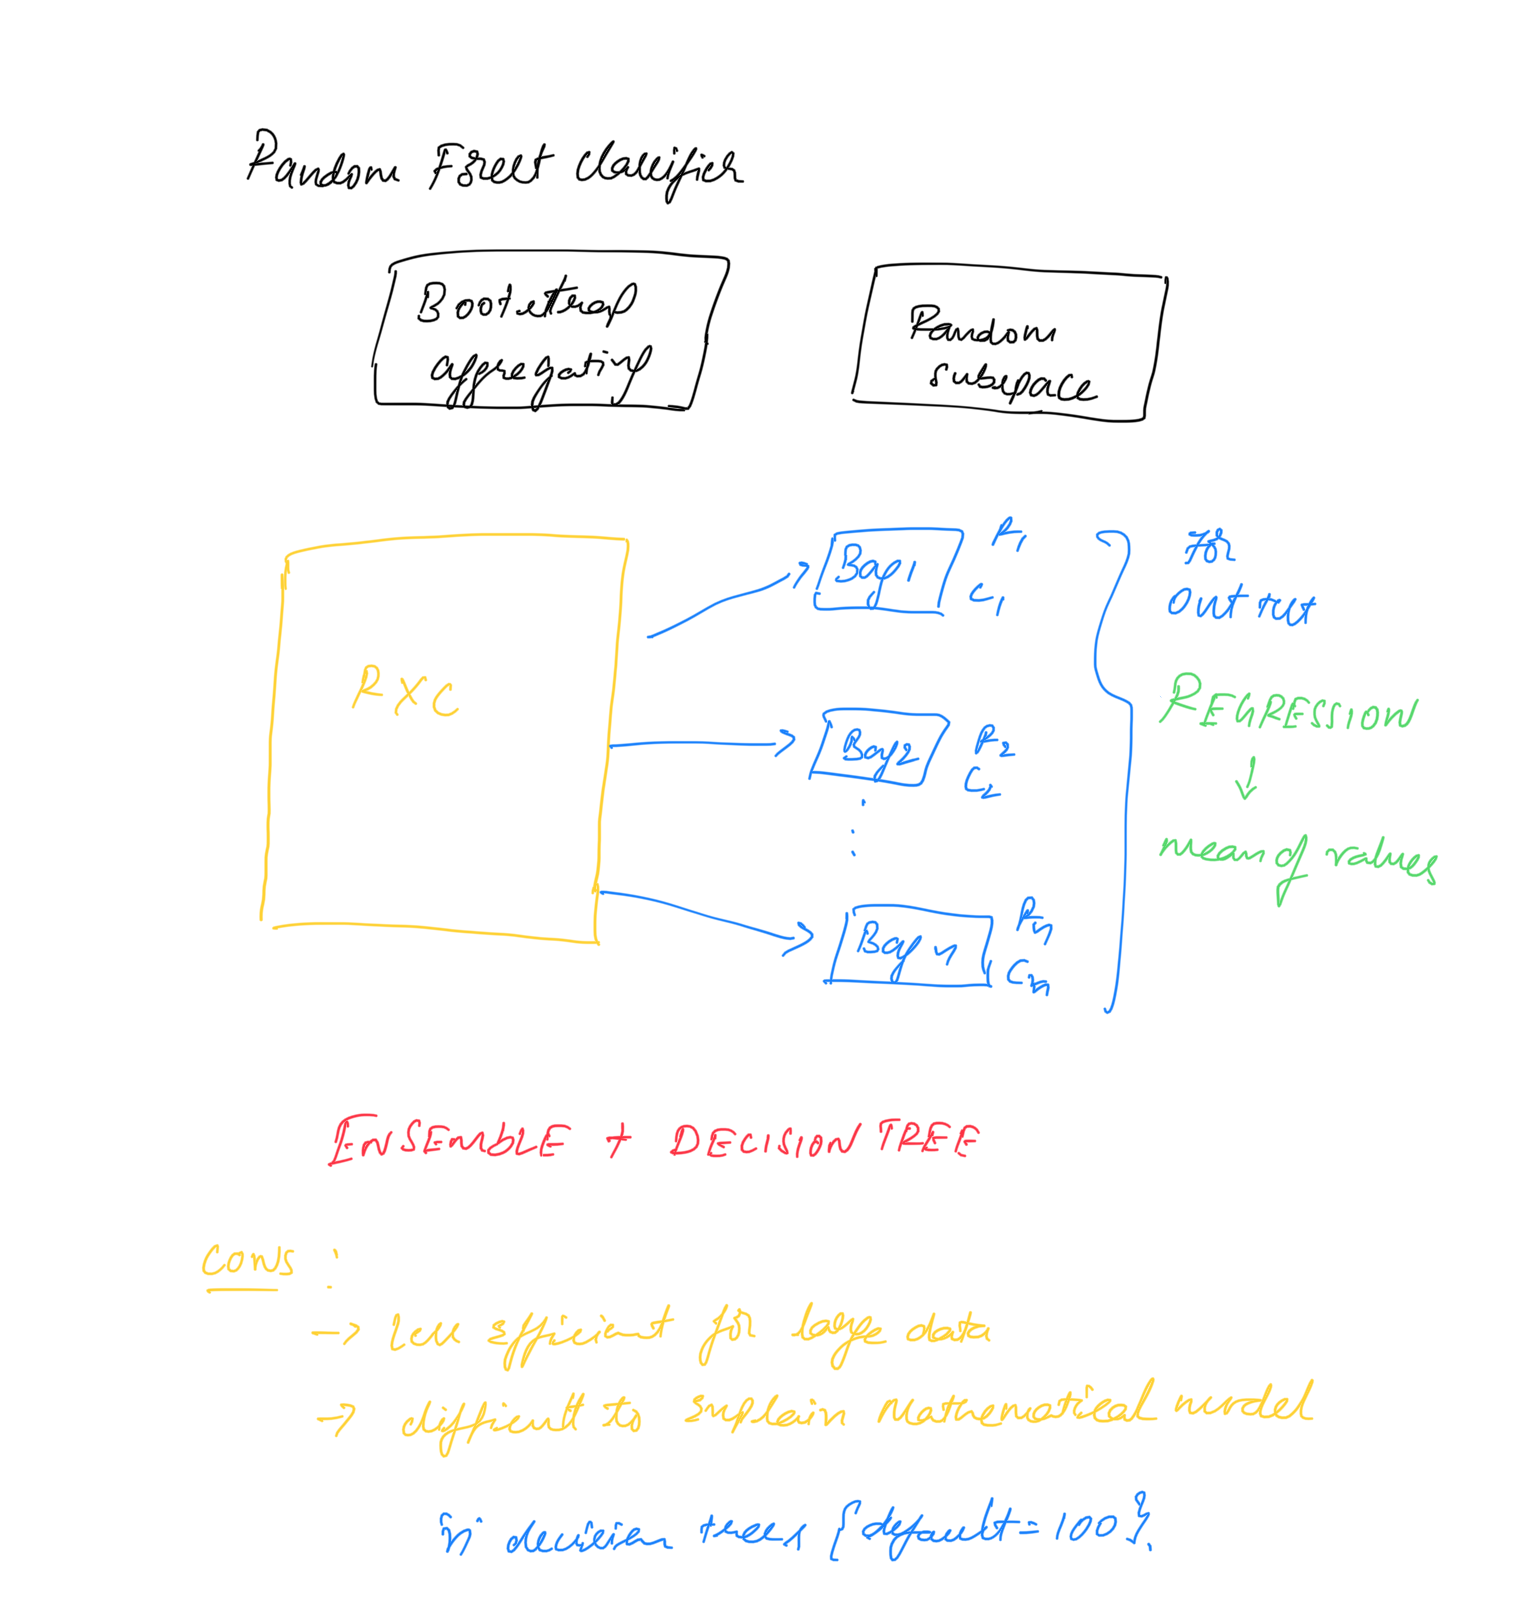

In [31]:
from sklearn.ensemble import RandomForestClassifier

In [35]:
clf = RandomForestClassifier(n_estimators = 100)

## RandomForestClassifier

 -  n_estimators=100
 -  criterion='gini',
 -  max_depth=None,
 -  min_samples_split=2,
 -  min_samples_leaf=1,
 -  min_weight_fraction_leaf=0.0,
 -  max_features='auto',
 -  max_leaf_nodes=None,
 -  min_impurity_decrease=0.0,
 -  min_impurity_split=None,
 -  bootstrap=True,
 -  oob_score=False,
 -  n_jobs=None,
 -  random_state=None,
 -  verbose=0,
 -  warm_start=False,
 -  class_weight=None,
 -  ccp_alpha=0.0,
 -  max_samples=None,

In [36]:
x_train.head()

ph    Hardness        Solids  Chloramines     Sulfate  \
748   6.750761  207.254505  23642.992597     7.691012  293.783040   
2279  7.539742  201.959317  26716.359708     5.637350  333.073546   
1960  8.128270  231.167537  19954.575554     5.138838  349.067363   
1491  7.368166  204.041451   8524.874646     9.469763  429.814322   
2991  6.628256  198.865743  15911.357509     7.517906  342.015924   

      Conductivity  Organic_carbon  Trihalomethanes  Turbidity  
748     446.696939        6.000391        30.900815   2.777726  
2279    516.354560       14.985649        83.536821   4.210678  
1960    386.071149       15.018085        63.340968   4.678742  
1491    328.565288       11.173155        88.888819   3.684263  
2991    437.918625       15.005742        38.845958   4.464457

In [37]:
y_train.head()

748     1
2279    0
1960    1
1491    1
2991    0
Name: Potability, dtype: int64

In [38]:
clf.fit(x_train,y_train)

RandomForestClassifier()

In [39]:
y_pred=clf.predict(x_test)

In [40]:
## Accuracy of the Score  - even with varying value 
accuracy_score(y_pred, y_pred)

1.0

In [46]:
test_score = clf.score(x_test,y_test)
print("RandomForestClassifier Test Score:",test_score)

RandomForestClassifier Test Score: 0.6737804878048781


In [42]:
from sklearn.metrics import confusion_matrix, classification_report
confusion_matrix(y_test, y_pred)

array([[345,  57],
       [157,  97]])

In [45]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.69      0.86      0.76       402
           1       0.63      0.38      0.48       254

    accuracy                           0.67       656
   macro avg       0.66      0.62      0.62       656
weighted avg       0.67      0.67      0.65       656



In [266]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 80, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [2,4]
# Minimum number of samples required to split a node
min_samples_split = [2, 5]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2]
# Method of selecting samples for training each tree
bootstrap = [True, False]
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}



In [267]:
from sklearn.model_selection import GridSearchCV

clf_Grid = GridSearchCV(estimator = clf ,param_grid = param_grid, cv = 3, verbose = 2 , n_jobs = 2)

In [271]:
clf_Grid.fit(x_train, y_train)

Fitting 3 folds for each of 320 candidates, totalling 960 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=2,
             param_grid={'bootstrap': [True, False], 'max_depth': [2, 4],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [10, 17, 25, 33, 41, 48, 56, 64, 72,
                                          80]},
             verbose=2)

In [274]:
clf_Grid.best_params_

{'bootstrap': True,
 'max_depth': 4,
 'max_features': 'auto',
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 80}

In [245]:
keys = ['KNN','LogisticRegression','DecisionTree','Randomforest','supportvector','Gaussian']
values = [KNeighborsClassifier(),LogisticRegression(),DecisionTreeClassifier(),RandomForestClassifier(),SVC(),GaussianNB()]
models = dict(zip(keys,values))


In [246]:
for name,algo in models.items():
    model = algo
    model.fit(x_train,y_train)
    predict = model.predict(x_test)
    acc = model.score(x_train,y_train)
    print(name,acc)

KNN 0.7095419847328245
LogisticRegression 0.6091603053435114
DecisionTree 1.0
Randomforest 1.0
supportvector 0.6091603053435114
Gaussian 0.616793893129771


In [133]:
clf = LogisticRegression()
clf.fit(x_train,y_train)
test_score = clf.score(x_test,y_test)
y_pred=clf.predict(x_test)
print("LogisticRegression Test Score:",test_score)

RandomForestClassifier Test Score: 0.6128048780487805


In [134]:
clf = DecisionTreeClassifier()
clf.fit(x_train,y_train)
test_score = clf.score(x_test,y_test)
y_pred=clf.predict(x_test)
print("DecisionTreeClassifier Test Score:",test_score)

DecisionTreeClassifier Test Score: 0.5487804878048781


## Conclusion

- The TDS levels seem to contain some descripency since its values are on an average 40 folds more than the upper limit for safe drinking water.

- The data contains almost equal number of acidic and basic pH level water samples.
 
- 92% of the data was considered Hard.

- Only 2% of the water samples were safe in terms of Chloramines levels.

- Only 1.8% of the water samples were safe in terms of Sulfate levels.

- 90.6% of the water samples had higher Carbon levels than the typical Carbon levels in drinking water (10 ppm).

- 76.6% of water samples were safe for drinking in terms of Trihalomethane levels in water.

- 90.4% of the water samples were safe for drinking in terms of the Turbidity of water samples.

- The correlation coefficients between the features were very low.

- Random Forest gave highest Accuracy





$$ + H_an^kΨ $$


In [146]:
#Fill outlier for ph
df_ph = df['ph']
Q1_ph = df_ph.quantile(0.25)
Q3_ph = df_ph.quantile(0.75)
IQR_ph = Q3_ph - Q1_ph
low = Q1_ph - 1.5 * IQR_ph
top = Q3_ph + 1.5 * IQR_ph
print(top)
print(low)
outlier_ph = (df_ph < low) | (df_ph > top)
outlier_ph.head()
print('Sum of Outlier for PH:' , df_ph[outlier_ph].sum())
print(df_ph.mean())
df_ph[outlier_ph] = df_ph.mean()

9.556244968656587
4.584246671660642
Sum of Outlier for PH: 629.4818113410885
7.067060755433998


In [105]:
#Fill outlier for Hardness
df_h = df['Hardness']
Q1_h = df_h.quantile(0.25)
Q3_h = df_h.quantile(0.75)
IQR_h = Q3_h - Q1_h
low_h = Q1_h - 1.5 * IQR_h
top_h = Q3_h + 1.5 * IQR_h
print(top_h)
print(low_h)
outlier_h = (df_h < low_h) | (df_ph > top_h)
print('Sum of outlier for Hardness:' , df_h[outlier_h].sum())
print(df_h.mean())
df_h[outlier_h] = df_h.mean()

276.3928337208903
117.12516037150485
Sum of outlier for Hardness: 4622.3175594134555
196.36949601730177


In [107]:
#Fill outliers for Chloramins
df_ch = df['Chloramines']
Q1_ch = df_ch.quantile(0.25)
Q3_ch = df_ch.quantile(0.75)
IQR_ch = Q3_ch - Q1_ch
low_ch = Q1_ch - 1.5 * IQR_ch
top_ch = Q3_ch + 1.5 * IQR_ch
print(top_ch)
print(low_ch)
outliers_ch = (df_ch < low_ch) | (df_ch > top_ch)
print('Sum of outlier for Chloramines:' , outliers_ch.sum())
print(df_ch.mean())
df_ch[outliers_ch] = df_ch.mean()

11.09608644703562
3.146221340564705
Sum of outlier for Chloramines: 61
7.122276793425787


In [106]:
#Fill outlier for Solids
df_solids = df['Solids']
Q1_solids = df_solids.quantile(0.25)
Q3_solids = df_solids.quantile(0.75)
IQR_solids = Q3_solids - Q1_solids
low_s = Q1_solids - 1.5 * IQR_solids
top_s = Q3_solids + 1.5 * IQR_solids
print(top_s)
print(low_s)
outlier_solids = (df_solids < low_s) | (df_solids > top_s)
print('Sum of outliers for Solids:' , outlier_solids.sum())
print(df_solids.mean())
df_solids[outlier_solids] = df_solids.mean()

44831.86987314956
-1832.4174487462951
Sum of outliers for Solids: 47
22014.09252607711


In [108]:
#Fill outlier for Conductivity
df_con = df['Conductivity']
Q1_con = df_con.quantile(0.25)
Q3_con = df_con.quantile(0.75)
IQR_con = Q3_con - Q1_con
low_con = Q1_con - 1.5 * IQR_con
top_con = Q3_con + 1.5 * IQR_con
print(top_con)
print(low_con)
outliers_con = (df_ch < low_con) | (df_con > top_con)
print('Sum of outliers for Conductivity:' , outliers_con.sum())
print(df_con.mean())
df_con[outliers_con] = df_con.mean()

655.8791400416264
191.64757856456438
Sum of outliers for Conductivity: 3276
426.2051106825521


In [110]:
#Fill outlier for Organic Carbon
df_og = df['Organic_carbon']
Q1_og = df_og.quantile(0.25)
Q3_og = df_og.quantile(0.75)
IQR_og = Q3_og - Q1_og
low_og = Q1_og - 1.5 * IQR_og
top_og = Q3_og + 1.5 * IQR_og
print(top_og)
print(low_og)
outliers_og = (df_og < low_og) | (df_og > top_og)
print('Sum of outliers for Organic Carbon:' , outliers_og.sum())
print(df_og.mean())
df_og[outliers_og] = df_og.mean()

23.295426859188986
5.328026018267515
Sum of outliers for Organic Carbon: 25
14.284970247677336


In [112]:
#Fill outlier for Trihalomethanes
df_tr = df['Trihalomethanes']
Q1_tr = df_tr.quantile(0.25)
Q3_tr = df_tr.quantile(0.75)
IQR_tr = Q3_tr - Q1_tr
low_tr = Q1_tr - 1.5 * IQR_tr
top_tr = Q3_tr + 1.5 * IQR_tr
print(top_tr)
print(low_tr)
outliers_tr = (df_tr < low_tr) | (df_tr > top_tr)
print('Sum of outliers for Trihalomethanes:' , outliers_tr.sum())
print(df_tr.mean())
df_tr[outliers_tr] = df_tr.mean()

106.69503986064285
26.619225158022296
Sum of outliers for Trihalomethanes: 54
66.39629294676797


In [113]:
#Fill outlier for Turbidity
df_tur = df['Turbidity']
Q1_tur = df_tur.quantile(0.25)
Q3_tur = df_tur.quantile(0.75)
IQR_tur = Q3_tur - Q1_tur
low_tur = Q1_tur - 1.5 * IQR_tur
top_tur = Q3_tur + 1.5 * IQR_tur
print(low_tur)
print(top_tur)
outliers_tur = (df_tur < low_tur) | (df_tur > top_tur)
print('Sum of outliers for Turbidity:' , outliers_tur.sum())
print(df_tur.mean())
df_tur[outliers_tur] = df_tur.mean()

1.8487974931046152
6.091233163793407
Sum of outliers for Turbidity: 19
3.9667861697910576


In [114]:
X = df.drop('Potability',axis=1).values
y = df['Potability'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [115]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [119]:
models =[("LR", LogisticRegression(max_iter=1000)),("SVC", SVC()),('KNN',KNeighborsClassifier(n_neighbors=10)),
         ("DTC", DecisionTreeClassifier()),("GNB", GaussianNB()),
        ("SGDC", SGDClassifier()),("Perc", Perceptron()),("NC",NearestCentroid()),
        ("Ridge", RidgeClassifier()),("NuSVC", NuSVC()),("BNB", BernoulliNB()),
         ('RF',RandomForestClassifier()),('ADA',AdaBoostClassifier()),
        ('XGB',GradientBoostingClassifier()),('PAC',PassiveAggressiveClassifier())]

results = []
names = []
lastresults = []

for name,model in models:
    model.fit(X_train, y_train)
    model_results = model.predict(X_test)
    score = precision_score(y_test, model_results,average='macro')
    results.append(score)
    names.append(name)
    lastresults.append((name,score))
    
lastresults.sort(key=lambda k:k[1],reverse=True)

In [120]:
print('The Results Feelig Good:' , lastresults)

The Results Feelig Good: [('SVC', 0.7037017167381974), ('XGB', 0.6820698990893428), ('RF', 0.6618530295000883), ('NuSVC', 0.6398763911368291), ('KNN', 0.628465012736263), ('GNB', 0.6081055539400988), ('ADA', 0.5690883190883191), ('DTC', 0.550521637138095), ('NC', 0.52437903033198), ('PAC', 0.5216748768472906), ('Perc', 0.4927281622487102), ('SGDC', 0.45551061678463095), ('LR', 0.31135531135531136), ('Ridge', 0.31135531135531136), ('BNB', 0.31135531135531136)]


In [121]:
model_params = {
    'XGB':
    {
        'model':GradientBoostingClassifier(),
        'params':
        {
            'learning_rate':[0.0001,0.001,0.01,0.1],
            'n_estimators':[100,200,500,1000],
            'max_features':['sqrt','log2'],
            'max_depth':list(range(11))
        }
    },
    'Random Forest':
    {
        'model':RandomForestClassifier(),
        'params':
        {
            'n_estimators':[20,50,100,200,400],
            'max_features':['auto','sqrt','log2'],
            'max_depth':list(range(1,11))
        }
    }
}

In [ ]:
param=dff['Parameters']
model = VotingClassifier(estimators=[
                                     ('XGB',GradientBoostingClassifier(**param[0])),
                                     ('RF',RandomForestClassifier(**param[1])),
                                    ],voting='hard')

accuracy=[]
scaler = StandardScaler()
skf = RepeatedStratifiedKFold(n_splits=5,n_repeats=2)
skf.get_n_splits(X,y)

for train_index, test_index in skf.split(X,y):
    
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    scaler.fit(X_train)
    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)
    
    model.fit(X_train,y_train)
    predictions=model.predict(X_test)
    score=accuracy_score(y_test,predictions)
    accuracy.append(score)    

NameError: name 'accuracy' is not defined